In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
co=pd.read_excel("C:\\Users\\91813\\OneDrive\\Desktop\\5656\\P204\\CO2 dataset.xlsx")
co

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


In [3]:
co.shape

(215, 2)

In [4]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [5]:
co.head(10)

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
5,1805,0.00536
6,1806,0.00529
7,1807,0.00523
8,1808,0.00517
9,1809,0.00511


In [6]:
co.tail(10)

,Year,CO2
205,2005,17.3
206,2006,16.7
207,2007,16.8
208,2008,16.8
209,2009,15.9
210,2010,15.6
211,2011,15.6
212,2012,14.8
213,2013,14.7
214,2014,15.1


In [7]:
co.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [8]:
co.dtypes

Year      int64
CO2     float64
dtype: object

In [9]:
# Checking for Null values
co.isnull().sum()

Year    0
CO2     0
dtype: int64

NO Null Values Present

<AxesSubplot:>

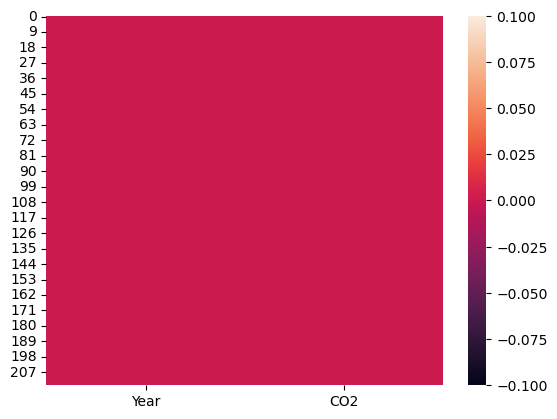

In [10]:
sns.heatmap(co.isnull())

In [11]:
# Checking for Duplicate Values
co[co.duplicated()]

,Year,CO2


NO Duplicate Values Present

In [12]:
# Checking The Corelation
co.corr()

,Year,CO2
Year,1.000000,0.951243
CO2,0.951243,1.000000


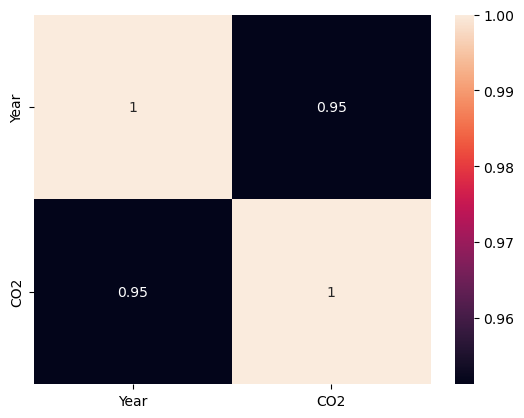

In [13]:
sns.heatmap(co.corr(),annot=True)
plt.show()

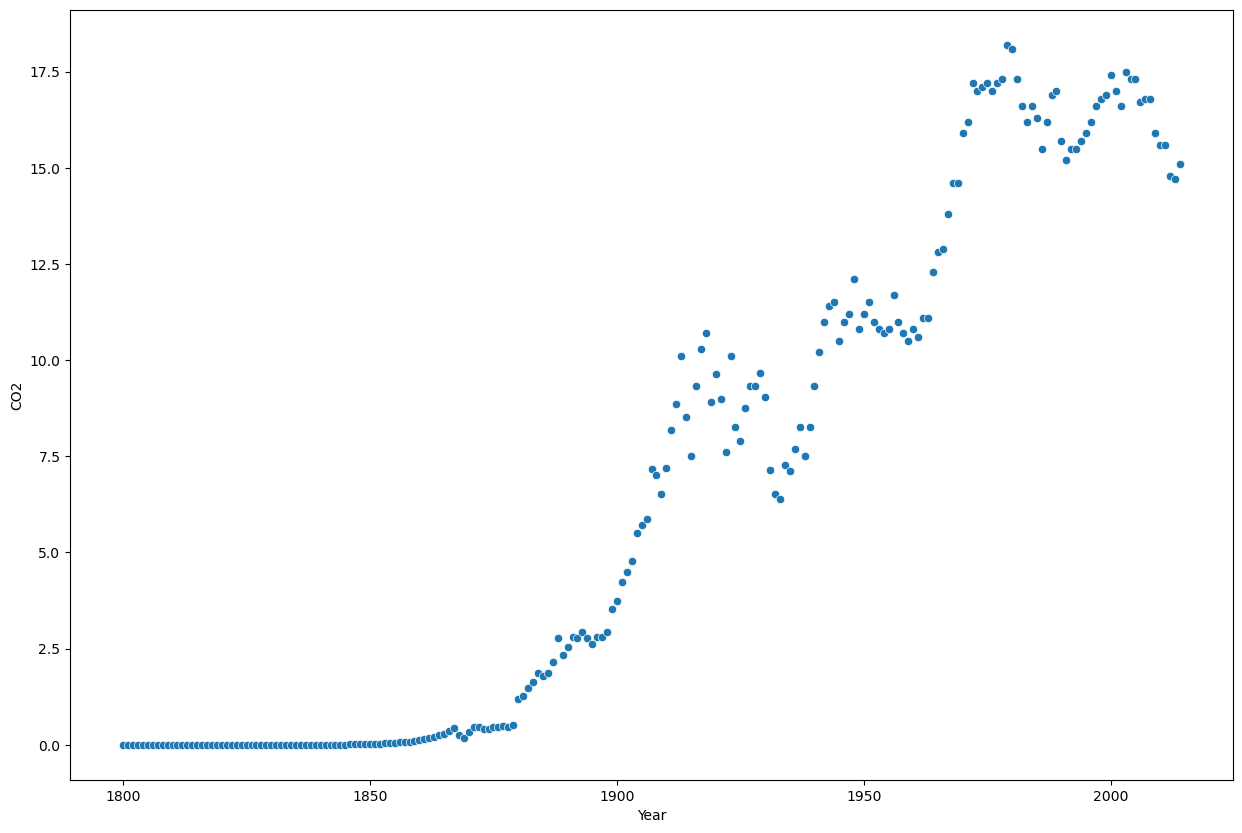

In [14]:
# Visualisation Using Scatterplot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Year',y='CO2',data=co)
plt.show()

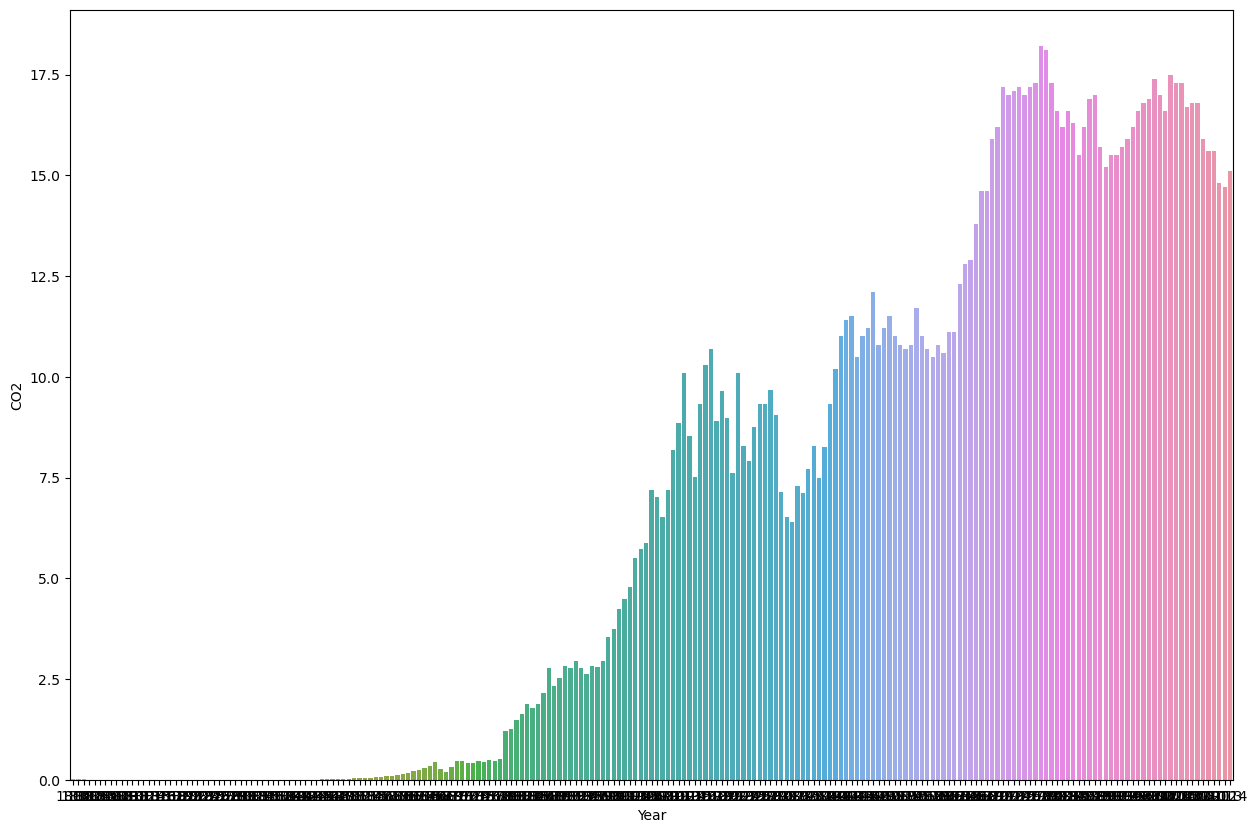

In [15]:
# Visualization using Barplot
plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='CO2',data=co)
plt.show()

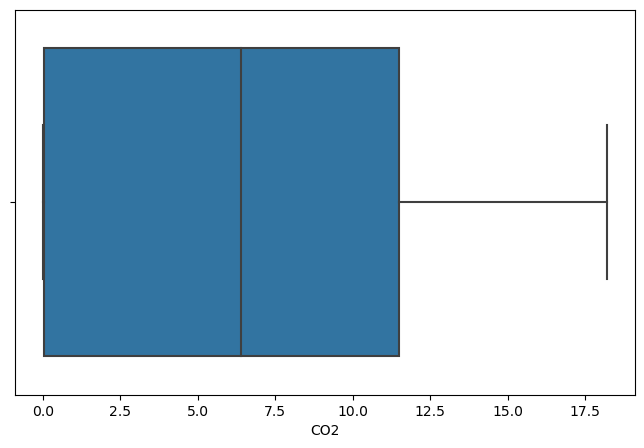

In [16]:
# Detecting Outliers
plt.figure(figsize=(8,5))
sns.boxplot(co.CO2)
plt.show()

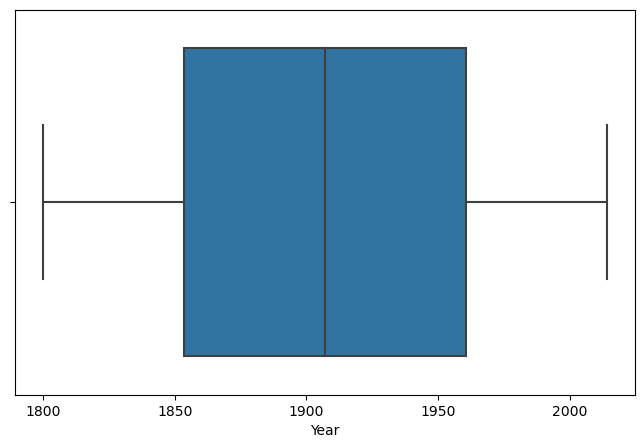

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(co.Year)
plt.show()

Data is free from Outliers

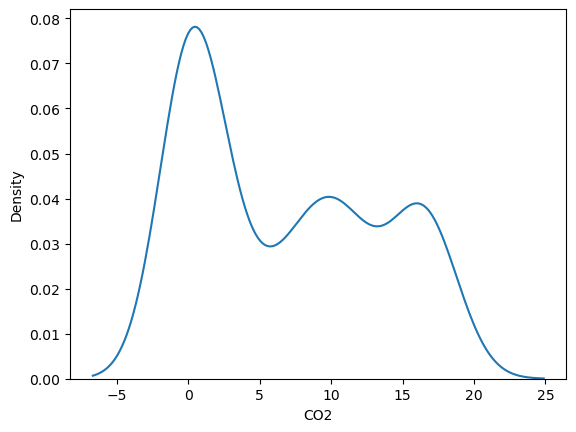

In [18]:
# Visualization Using kdeplot


sns.kdeplot(co.CO2)
plt.show()

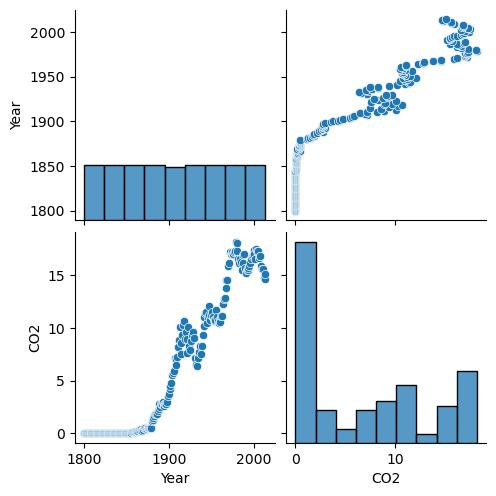

In [19]:
sns.pairplot(co)
plt.show()

#### Converting float into datetime format

In [20]:
co2=co.copy()

In [21]:
co2["Year"]=pd.to_datetime(co2["Year"])
co2

,Year,CO2
0,1970-01-01 00:00:00.000001800,0.00568
1,1970-01-01 00:00:00.000001801,0.00561
2,1970-01-01 00:00:00.000001802,0.00555
3,1970-01-01 00:00:00.000001803,0.00548
4,1970-01-01 00:00:00.000001804,0.00542
...,...,...
210,1970-01-01 00:00:00.000002010,15.60000
211,1970-01-01 00:00:00.000002011,15.60000
212,1970-01-01 00:00:00.000002012,14.80000
213,1970-01-01 00:00:00.000002013,14.70000


### Time Series Decomposition Plot

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

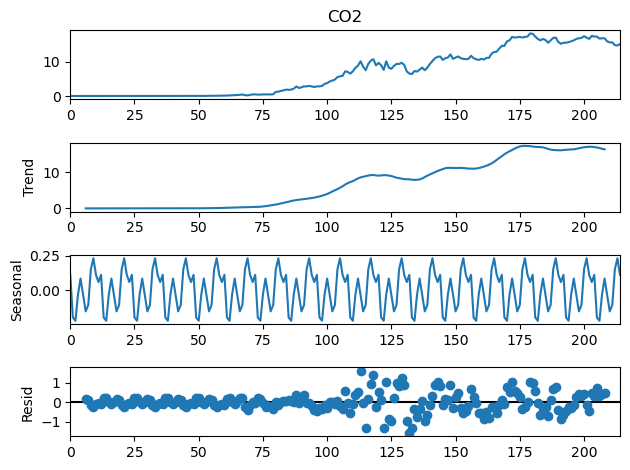

In [23]:
decompose_ts_add=seasonal_decompose(co["CO2"],period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots - To Identify the significant features that contribute to forcast

In [24]:
import statsmodels.graphics.tsaplots as tsa_plots

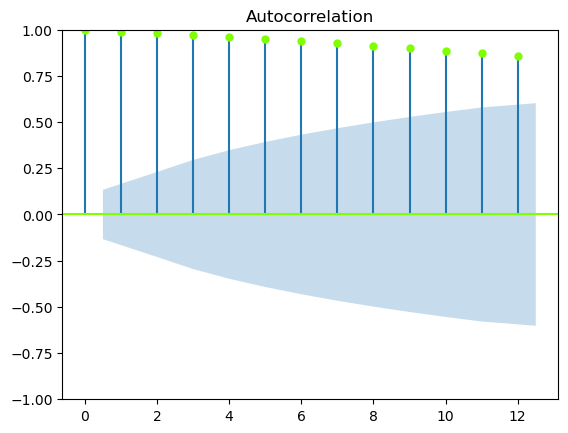

In [25]:
tsa_plots.plot_acf(co["CO2"],lags=12,color="chartreuse")
plt.show()

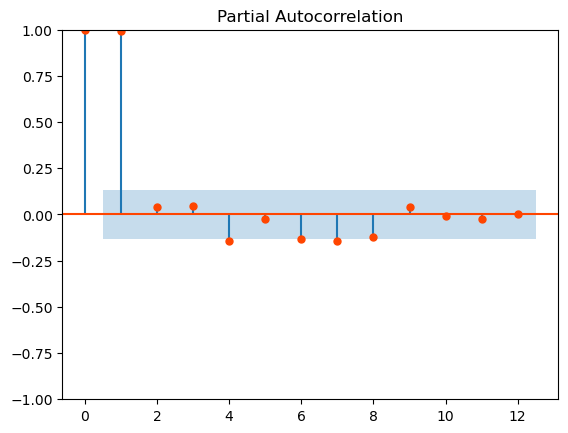

In [26]:
tsa_plots.plot_pacf(co["CO2"],lags=12,color="orangered")
plt.show()

### Transformations

#### Square Root Transform

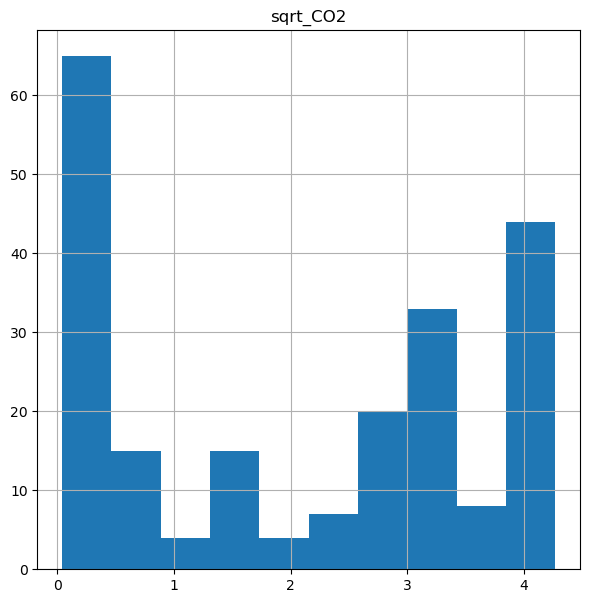

In [27]:
#Square root transformation
co['sqrt_CO2'] = np.sqrt(co['CO2'])
co.hist(column='sqrt_CO2',figsize=(7,7))
plt.show()

#### Log Transform

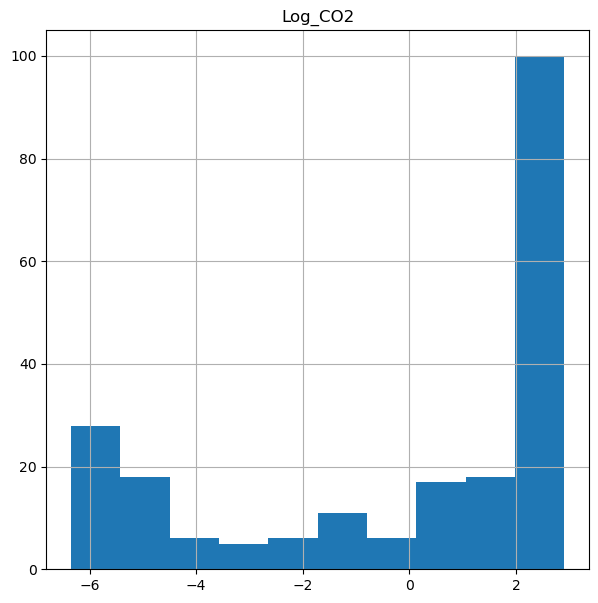

In [28]:
#Log Transformation

co['Log_CO2'] = np.log(co['CO2'])
co.hist(column='Log_CO2',figsize=(7,7))
plt.show()

#### Reciprocal Transform:

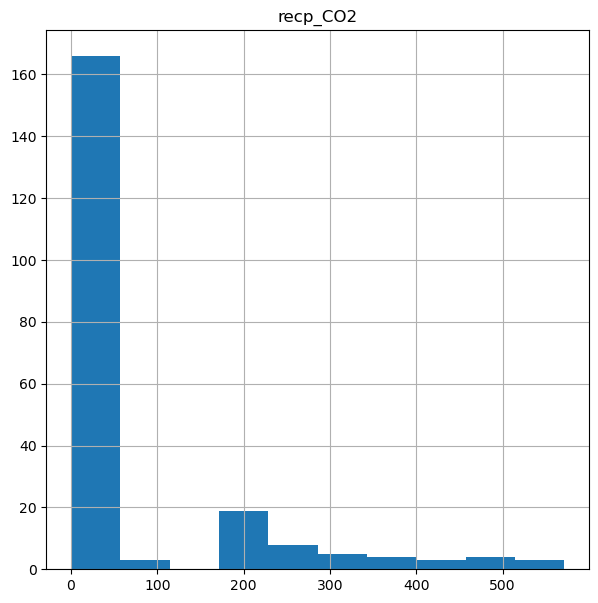

In [29]:
#Reciprocal Transformation

co['recp_CO2'] = np.reciprocal(co['CO2'])
co.hist(column='recp_CO2',figsize=(7,7))
plt.show()

### Exponential transformation:

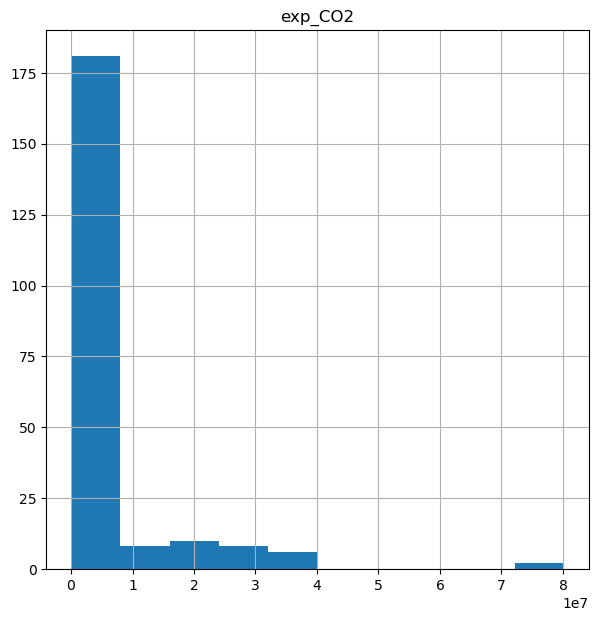

In [30]:
#Exponential transformation

co['exp_CO2'] = np.exp(co['CO2'])
co.hist(column='exp_CO2',figsize=(7,7))
plt.show()

In [31]:
co

,Year,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
0,1800,0.00568,0.075366,-5.170804,176.056338,1.005696e+00
1,1801,0.00561,0.074900,-5.183205,178.253119,1.005626e+00
2,1802,0.00555,0.074498,-5.193957,180.180180,1.005565e+00
3,1803,0.00548,0.074027,-5.206650,182.481752,1.005495e+00
4,1804,0.00542,0.073621,-5.217659,184.501845,1.005435e+00
...,...,...,...,...,...,...
210,2010,15.60000,3.949684,2.747271,0.064103,5.956538e+06
211,2011,15.60000,3.949684,2.747271,0.064103,5.956538e+06
212,2012,14.80000,3.847077,2.694627,0.067568,2.676445e+06
213,2013,14.70000,3.834058,2.687847,0.068027,2.421748e+06


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(co)
scaled_features = scaler.transform(co)

In [33]:
# Standardizing dataset :
from sklearn.preprocessing import StandardScaler
array = co.dropna().values
scaler = StandardScaler().fit(array)
rescaled = scaler.transform(array)

# summarize transformed data
from numpy import set_printoptions
set_printoptions(precision=4)
print(rescaled[:,:])

[[-1.724  -1.0352 -1.2476 -1.5114  0.8199 -0.3848]
 [-1.7079 -1.0352 -1.2479 -1.5151  0.8364 -0.3848]
 [-1.6918 -1.0352 -1.2482 -1.5184  0.8509 -0.3848]
 ...
 [ 1.6918  1.2383  1.1292  0.8591 -0.5011 -0.1383]
 [ 1.7079  1.2229  1.121   0.857  -0.5011 -0.1617]
 [ 1.724   1.2844  1.1536  0.8651 -0.5011 -0.052 ]]


#### Create a CSV file of clean data

In [34]:
co.to_csv("Clean Data.csv")

### Time Series Forecasting Models

In [35]:
# Splitting the data
Train=co.head(170)
Test=co.tail(45)

In [36]:
Train.head()

,Year,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
0,1800,0.00568,0.075366,-5.170804,176.056338,1.005696
1,1801,0.00561,0.074900,-5.183205,178.253119,1.005626
2,1802,0.00555,0.074498,-5.193957,180.180180,1.005565
3,1803,0.00548,0.074027,-5.206650,182.481752,1.005495
4,1804,0.00542,0.073621,-5.217659,184.501845,1.005435


In [37]:
Test.head()

,Year,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2
170,1970,15.9,3.987480,2.766319,0.062893,8.040485e+06
171,1971,16.2,4.024922,2.785011,0.061728,1.085352e+07
172,1972,17.2,4.147288,2.844909,0.058140,2.950293e+07
173,1973,17.0,4.123106,2.833213,0.058824,2.415495e+07
174,1974,17.1,4.135215,2.839078,0.058480,2.669535e+07


In [38]:
# Creating a user defined function- to calculate the RMSE value

def RMSE_Value(forecast, actual):

    rmse_val = np.mean((forecast - actual)**2)**.5  
    return(rmse_val)

### Simple Exponential Method

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [40]:
# Model Building
ses_model = SimpleExpSmoothing(Train["CO2"]).fit()
# Model fitting
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
# RMSE Value
rmse_ses_model = RMSE_Value(pred_ses,Test.CO2)
rmse_ses_model

2.066358260373496

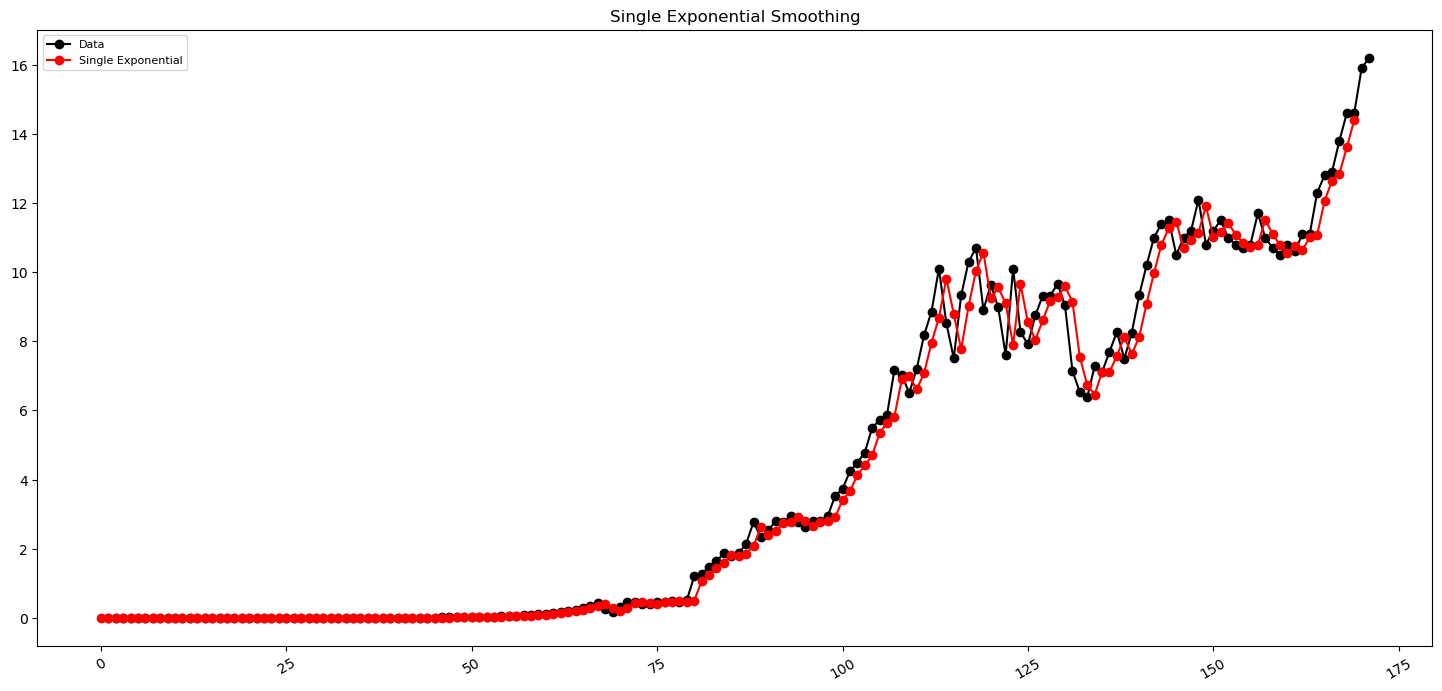

In [41]:
# Exponential Smoothing-Single:

data_SE = co[1:172]["CO2"]


fit1 = SimpleExpSmoothing(Train["CO2"]).fit(smoothing_level=0.8, optimized=False)


plt.figure(figsize=(18,8))


plt.plot(data_SE, marker="o", color="black", label='Data') 

plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker="o", color="red",label='Single Exponential')

plt.title('Single Exponential Smoothing')

plt.legend(loc='upper left', fontsize=8)

plt.show()

### Holt Method

In [42]:
# Model Building
hw_model = Holt(Train['CO2']).fit()
# Model Prediction
pred_hw = hw_model.predict(start = Test.index[0],end= Test.index[-1])
# RMSE Value 
rmse_hw_model = RMSE_Value(pred_hw,Test.CO2)
rmse_hw_model

1.6331054665158682

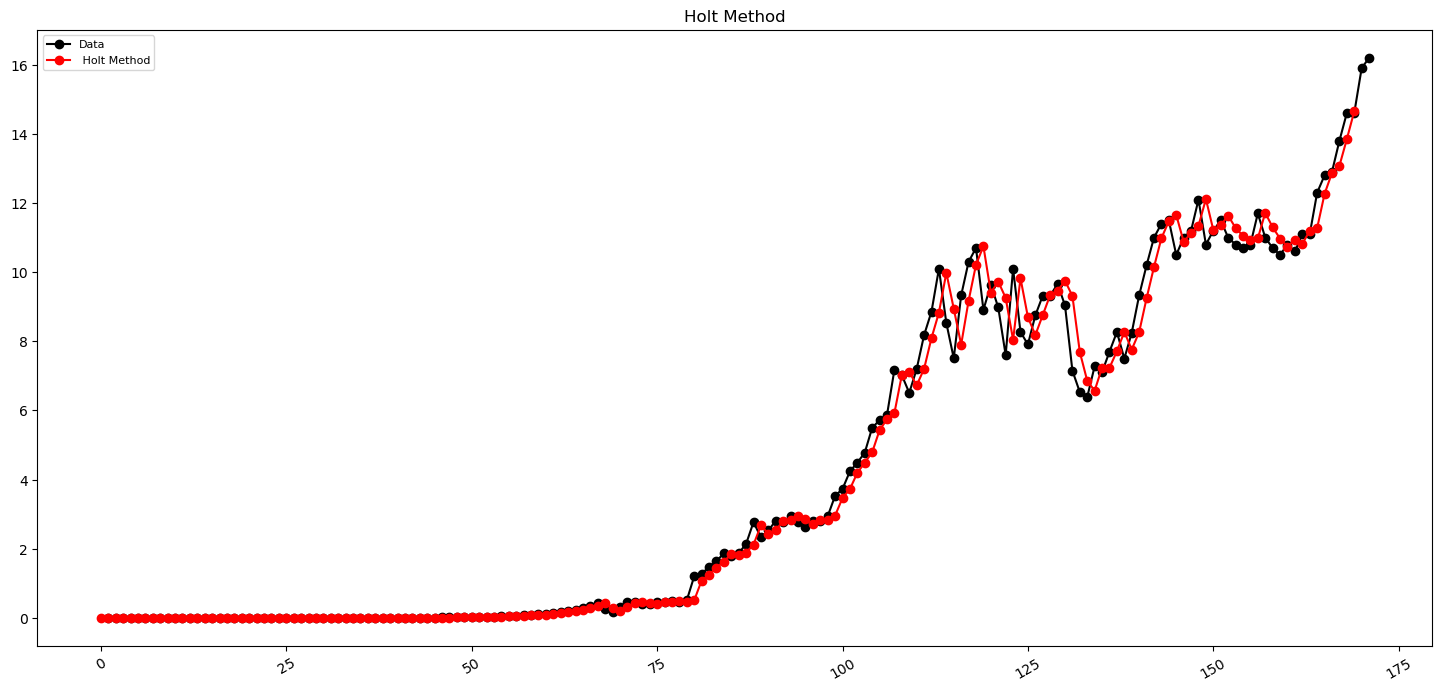

In [43]:
# Holt Method


fit2 = Holt(Train["CO2"], exponential=True).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))



plt.plot(data_SE, marker="o", color="black", label='Data') 

plt.xticks(rotation=30)



plt.plot(fit2.fittedvalues, marker="o", color="red",label = " Holt Method")

plt.title('Holt Method')

plt.legend(loc='upper left', fontsize=8)

plt.show()

### Holts winter exponential smoothing with additive seasonality and additive trend


In [50]:
# Model Building
hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit()
#Model Prediction
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
# RMSE Value
rmse_hwe_add_add_model = RMSE_Value(pred_hwe_add_add,Test.CO2)
rmse_hwe_add_add_model


1.679506897103125

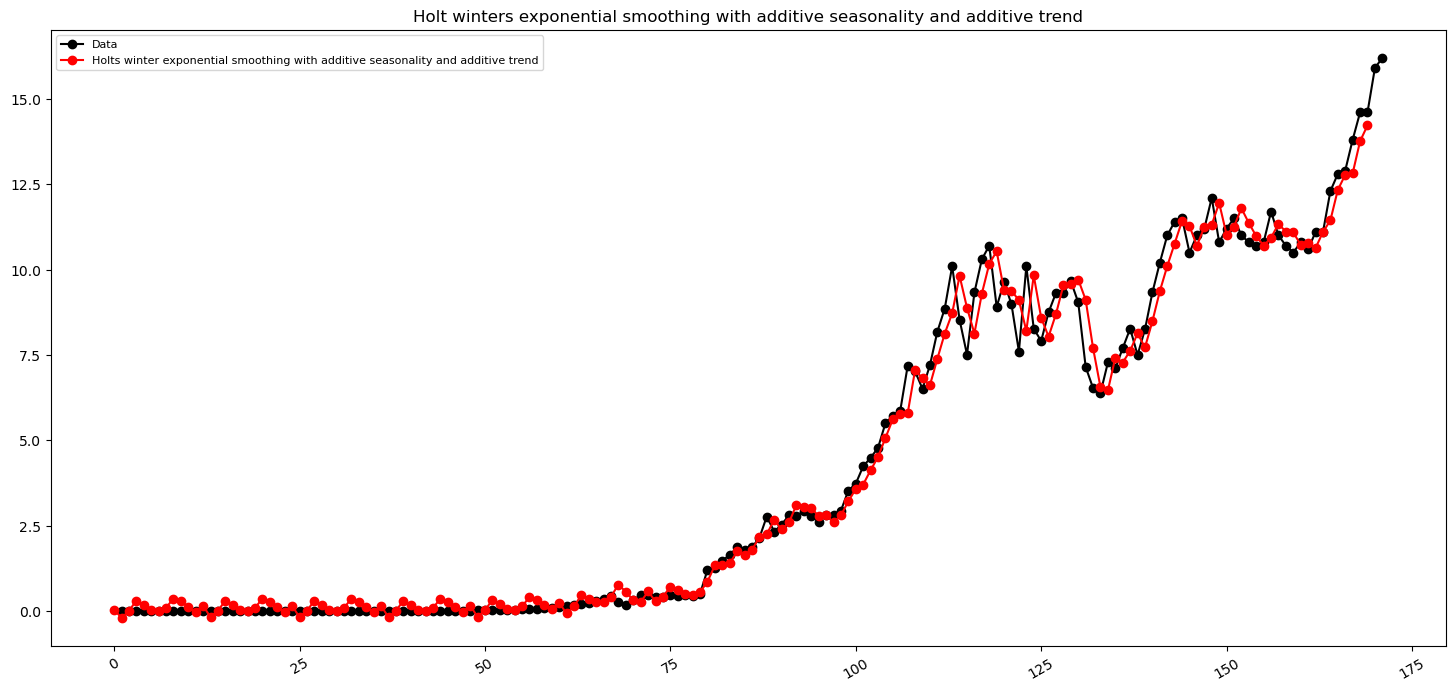

In [51]:
# Holts winter exponential smoothing with additive seasonality and additive trend


fit3 = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o", color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit3.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with additive seasonality and additive trend")

plt.title('Holt winters exponential smoothing with additive seasonality and additive trend')

plt.legend(loc='upper left', fontsize=8)

plt.show()

### Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [52]:
# Model Building
hwe_model_mul_add = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
# Model Predicting
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
# RMSE Value
rmse_hwe_model_mul_add_model = RMSE_Value(pred_hwe_mul_add,Test.CO2)
rmse_hwe_model_mul_add_model

C:\Users\91813\anaconda 222\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


10.672988824957576

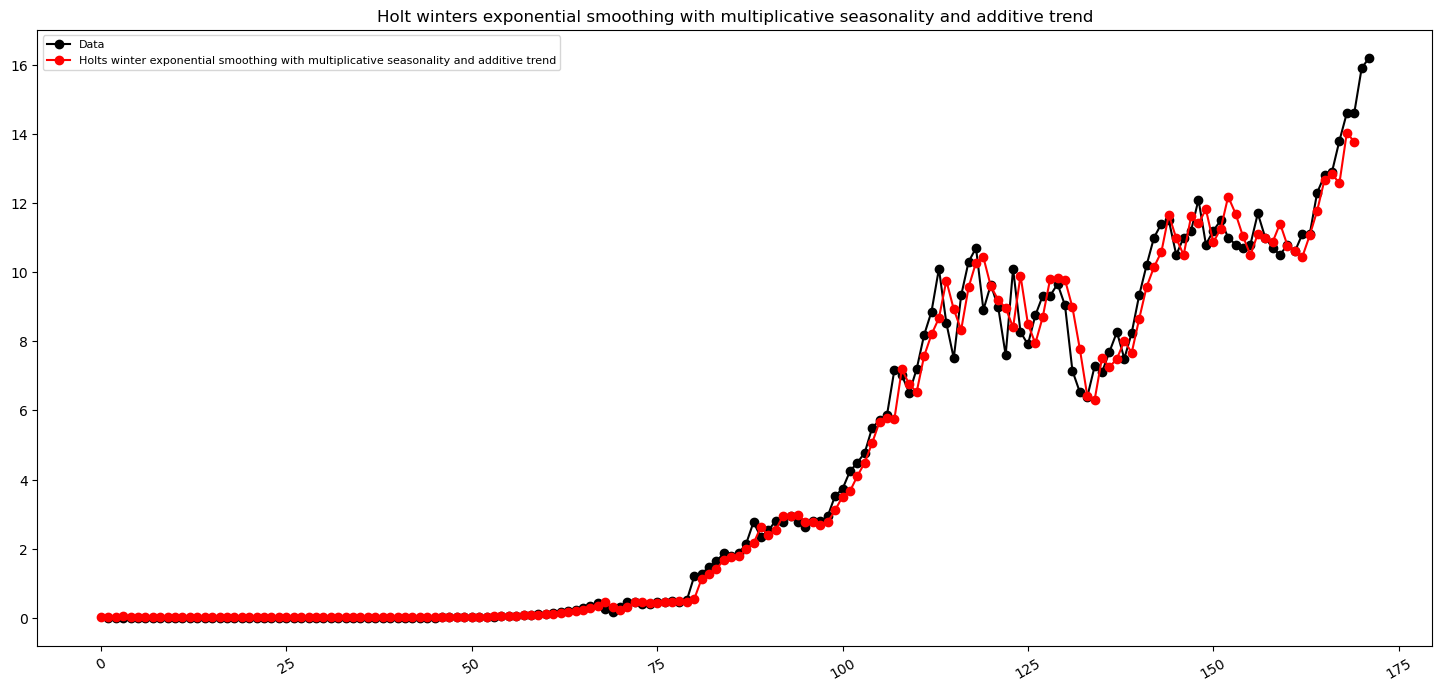

In [53]:

# ### Holts winter exponential smoothing with multiplicative seasonality and additive trend

fit4 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o", color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit4.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and additive trend")

plt.title('Holt winters exponential smoothing with multiplicative seasonality and additive trend')

plt.legend(loc='upper left', fontsize=8)

plt.show()


### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [54]:
# Model Building
hwe_model_mul_mul = ExponentialSmoothing(Train["CO2"],seasonal="mul",trend="mul",seasonal_periods=12).fit() 
# Model Prediction
pred_hwe_mul_mul = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
#RMSE Value
rmse_hwe_model_mul_mul_model = RMSE_Value(pred_hwe_mul_mul,Test.CO2)
rmse_hwe_model_mul_mul_model

C:\Users\91813\anaconda 222\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


10.672988824957576

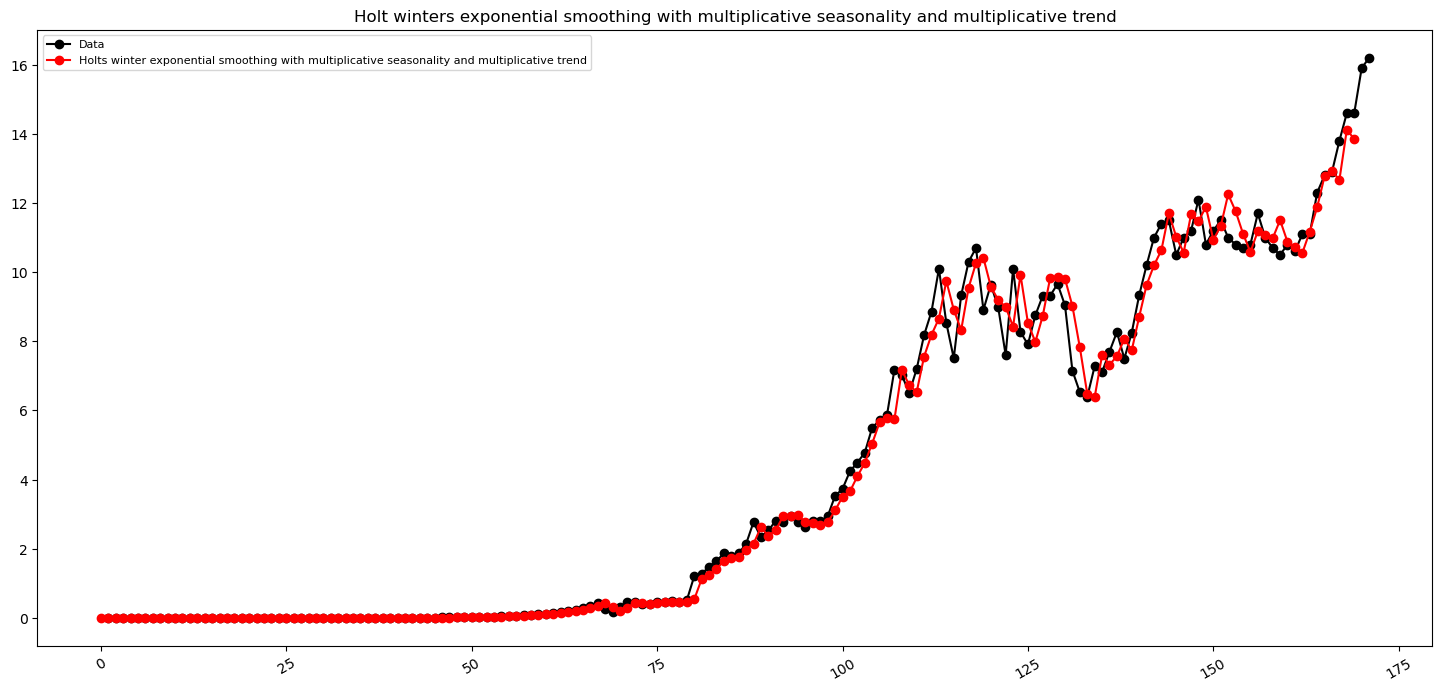

In [55]:
# Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

fit5 = ExponentialSmoothing(Train["CO2"], seasonal="mul",trend="mul",seasonal_periods=12).fit(smoothing_level=0.8)

plt.figure(figsize=(18,8))

plt.plot(data_SE, marker="o",  color="black",label="Data")

plt.xticks(rotation=30)


plt.plot(fit5.fittedvalues, marker="o", color="red",label="Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend")

plt.title('Holt winters exponential smoothing with multiplicative seasonality and multiplicative trend')

plt.legend(loc='upper left', fontsize=8)

plt.show()

In [56]:
# creating a column for time in the dataset
co["t"] = np.arange(1,216)

# Creating a squared time column for using in the quardratic model
co["t_squared"]=co["t"]*co["t"]

# Creating a log transformation for the dependent variable for exponential model
co["lg_CO2"]= np.log(co["CO2"])

co.head()


,Year,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
0,1800,0.00568,0.075366,-5.170804,176.056338,1.005696,1,1,-5.170804
1,1801,0.00561,0.074900,-5.183205,178.253119,1.005626,2,4,-5.183205
2,1802,0.00555,0.074498,-5.193957,180.180180,1.005565,3,9,-5.193957
3,1803,0.00548,0.074027,-5.206650,182.481752,1.005495,4,16,-5.206650
4,1804,0.00542,0.073621,-5.217659,184.501845,1.005435,5,25,-5.217659


In [57]:
#Splitting data into Train and Test
Train_m = co.head(172)
Test_m = co.tail(43)

In [58]:
# Importing Libraries
import statsmodels.formula.api as smf

In [59]:
co.head()

,Year,CO2,sqrt_CO2,Log_CO2,recp_CO2,exp_CO2,t,t_squared,lg_CO2
0,1800,0.00568,0.075366,-5.170804,176.056338,1.005696,1,1,-5.170804
1,1801,0.00561,0.074900,-5.183205,178.253119,1.005626,2,4,-5.183205
2,1802,0.00555,0.074498,-5.193957,180.180180,1.005565,3,9,-5.193957
3,1803,0.00548,0.074027,-5.206650,182.481752,1.005495,4,16,-5.206650
4,1804,0.00542,0.073621,-5.217659,184.501845,1.005435,5,25,-5.217659


### Linear Model

In [60]:
# Model Building
linear_model = smf.ols('CO2~t',data=Train_m).fit()
# Model Prediction
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test_m['t'])))

#RMSE value
rmse_linear_model = RMSE_Value(pred_linear,Test_m['CO2'])
rmse_linear_model

3.1445157061117723

In [61]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     944.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           2.54e-71
Time:                        16:35:01   Log-Likelihood:                -351.72
No. Observations:                 172   AIC:                             707.4
Df Residuals:                     170   BIC:                             713.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3801      0.288    -11.732      0.000      -3.949      -2.811
t              0.0888      0.003     30.734      0.000       0.083       0.094
==============================================================================
Omnibus:                       38.221   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.438
Skew:                           0.105   Prob(JB):                       0.0147
Kurtosis:                       1.936   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exponential Model

In [62]:
# Model Building
Exp = smf.ols('lg_CO2~t',data=Train_m).fit()
# Model Prediction
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test_m['t'])))

#RMSE value
rmse_Exp_model = RMSE_Value(np.exp(pred_Exp),Test_m['CO2'])
rmse_Exp_model

550.3307096054023

In [63]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lg_CO2   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1198.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           6.73e-79
Time:                        16:35:02   Log-Likelihood:                -271.13
No. Observations:                 172   AIC:                             546.3
Df Residuals:                     170   BIC:                             552.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3091      0.180    -34.988      0.000      -6.665      -5.953
t              0.0626      0.002     34.616      0.000       0.059       0.066
==============================================================================
Omnibus:                       14.863   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.019
Skew:                          -0.460   Prob(JB):                      0.00668
Kurtosis:                       2.257   Cond. No.                         200.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Quadratic Model

In [64]:
# Model Building
Quad = smf.ols('CO2~t+t_squared',data=Train_m).fit()
# Model Prediction
pred_Quad = pd.Series(Quad.predict(Test_m[["t","t_squared"]]))

#RMSE VALUE
rmse_Quad_model = RMSE_Value(pred_Quad,Test_m['CO2'])
rmse_Quad_model

4.495138217852161

In [65]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1128.
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           1.78e-98
Time:                        16:35:03   Log-Likelihood:                -284.37
No. Observations:                 172   AIC:                             574.7
Df Residuals:                     169   BIC:                             584.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2444      0.295     -0.828      0.409      -0.827       0.338
t             -0.0193      0.008     -2.456      0.015      -0.035      -0.004
t_squared      0.0006   4.41e-05     14.172      0.000       0.001       0.001
==============================================================================
Omnibus:                       33.246   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.854
Skew:                           1.048   Prob(JB):                     1.49e-11
Kurtosis:                       4.601   Cond. No.                     4.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
MOD=pd.DataFrame({'models':['Single Exponential','Holt Method','Holt Winter Add Sea Add Tre',
                       'Holt Winter Exp Mul Sea Add Tre','Holt Winter Exp Mul Sea Mul Tre',
                       'Linear Model','Exponential Model','Quadratic Model'],
             'RMSE Value':[rmse_ses_model,rmse_hw_model,rmse_hwe_add_add_model,rmse_hwe_model_mul_add_model,
             rmse_hwe_model_mul_mul_model,rmse_linear_model,rmse_Exp_model,rmse_Quad_model]})

In [67]:
MOD

,models,RMSE Value
0,Single Exponential,2.066358
1,Holt Method,1.633105
2,Holt Winter Add Sea Add Tre,1.679507
3,Holt Winter Exp Mul Sea Add Tre,10.672989
4,Holt Winter Exp Mul Sea Mul Tre,10.672989
5,Linear Model,3.144516
6,Exponential Model,550.330710
7,Quadratic Model,4.495138


In [68]:
import pickle

In [69]:
pickle.dump(hw_model, open('holt.pkl','wb'))